In [5]:
import os
from time import time
import pytest
import numpy as np
from astropy.io.fits import HDUList
from astropy import units as u
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import scopesim
from scopesim.source.source_templates import star_field, empty_sky
import scopesim_templates as sim_tp

In [3]:
plt.rcParams["figure.figsize"] = [12,12]

PKGS_DIR = os.path.abspath("../..")
scopesim.rc.__config__["!SIM.file.local_packages_path"] = PKGS_DIR
PKGS_DIR

'C:\\Work\\irdb'

Lp = 300e3 ph s-1 pix-1

Mp = 1200e3 ph s-1 pix-1


In [15]:
src = empty_sky()

metis = scopesim.OpticalTrain("METIS")
metis['scope_vibration'].include = False
metis['detector_linearity'].include = False
metis["armazones_atmo_default_ter_curve"].include = False

In [19]:
metis.observe(src)
hdus = metis.readout()

Preparing 1 FieldOfViews


In [20]:
np.average(metis.image_planes[0].data), np.average(.data)

305.6810357108193

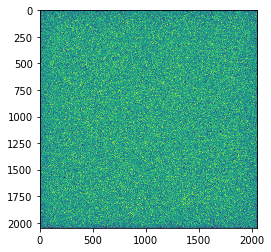

In [21]:
im = hdus[0][1].data
plt.imshow(im, norm=LogNorm(),
           vmin=0.7*np.median(im),
           vmax=1.3*np.median(im))